## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro



In [2]:
df = pd.read_csv('data/df_sample_1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-09-30,DL,DL_CODESHARE,DL,5119,9E,N319PQ,5119,14576,ROC,...,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30,DL,DL_CODESHARE,DL,5123,9E,N909XJ,5123,12451,JAX,...,828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-09-30,DL,DL_CODESHARE,DL,5124,9E,N181PQ,5124,12953,LGA,...,1148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-09-30,DL,DL_CODESHARE,DL,5126,9E,N8918B,5126,12264,IAD,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-09-30,DL,DL_CODESHARE,DL,5127,9E,N8839E,5127,13931,ORF,...,290,0.0,0.0,0.0,0.0,53.0,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

### Checking Null values

In [6]:
df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                  49269
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                 258814
dep_delay                263754
taxi_out                 273274
wheels_off               273264
wheels_on                281162
taxi_in                  281172
crs_arr_time                  0
arr_time                 275079
arr_delay                311744
cancelled                     0
cancellation_code      15658277
diverted                      0
dup                           0
crs_elapsed_time             20
actual_elapsed_time      309157
air_time                 315221
flights 

In [4]:
df.shape

(15927485, 42)

### Dropping Null values

In [4]:
df.dropna(subset=['dep_time', 'dep_delay','taxi_out','wheels_off','wheels_on','arr_time','arr_delay','actual_elapsed_time','air_time'], inplace=True)

In [6]:
df.shape

(15605077, 42)

In [5]:
df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                      0
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                      0
dep_delay                     0
taxi_out                      0
wheels_off                    0
wheels_on                     0
taxi_in                       0
crs_arr_time                  0
arr_time                      0
arr_delay                     0
cancelled                     0
cancellation_code      15605077
diverted                      0
dup                           0
crs_elapsed_time              1
actual_elapsed_time           0
air_time                      0
flights 

In [13]:
df[['cancellation_code','no_name']].head()

,fl_date,cancellation_code,no_name
0,2018-09-30,NaN,NaN
1,2018-09-30,NaN,NaN
2,2018-09-30,NaN,NaN
3,2018-09-30,NaN,NaN
4,2018-09-30,NaN,NaN


## Drop 'no_name', 'cancellation_code' columns as they all contains Null values

In [6]:
df.drop(['no_name', 'cancellation_code'], axis=1, inplace=True)

In [15]:
df.isna().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                      0
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                      0
dep_delay                     0
taxi_out                      0
wheels_off                    0
wheels_on                     0
taxi_in                       0
crs_arr_time                  0
arr_time                      0
arr_delay                     0
cancelled                     0
diverted                      0
dup                           0
crs_elapsed_time              1
actual_elapsed_time           0
air_time                      0
flights                       0
distance

### Checking remaining fields with Null values

In [26]:
df[['carrier_delay','weather_delay','first_dep_time','total_add_gtime','longest_add_gtime']].tail(10)

,carrier_delay,weather_delay,first_dep_time,total_add_gtime,longest_add_gtime
15927475,NaN,NaN,NaN,NaN,NaN
15927476,NaN,NaN,NaN,NaN,NaN
15927477,NaN,NaN,NaN,NaN,NaN
15927478,NaN,NaN,NaN,NaN,NaN
15927479,NaN,NaN,NaN,NaN,NaN
15927480,48.0,0.0,1033.0,1.0,1.0
15927481,34.0,0.0,NaN,NaN,NaN
15927482,NaN,NaN,NaN,NaN,NaN
15927483,NaN,NaN,NaN,NaN,NaN
15927484,NaN,NaN,NaN,NaN,NaN


### Replacing Null values with 0

In [7]:
df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime']] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime']].fillna(0)


In [8]:
df.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       1
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0


### Droppinig the last Null value in crs_elapsed_time       

In [9]:
df.dropna(subset=['crs_elapsed_time'], inplace=True)

In [10]:
df.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
op_carrier_fl_num      0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
first_dep_time         0
total_add_gtime        0
longest_add_gtime      0


In [34]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
diverted                 int64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance                 int64
carrier_

In [37]:
df['dup'].value_counts()

N    15605076
Name: dup, dtype: int64

In [38]:
df['diverted'].value_counts()

0    15605076
Name: diverted, dtype: int64

### Dropping dup' 'mkt_carrier' 'diverted' columns

In [11]:
df.drop(['dup', 'mkt_carrier','diverted'], axis=1, inplace=True)

### Saving Clean dataset to csv

In [12]:
df.to_csv('data/flights_cleaned.csv',index=False)

### Splitting and saving to csv

In [13]:
# Splitting the dataset into training and testing sets
df_train, df_test = train_test_split(df, test_size=0.3, random_state=20)

In [14]:
# Writing the training and testing sets to CSV files
df_train.to_csv("data/df_flights_train.csv",index=False)
df_test.to_csv("data/df_flights_test.csv",index=False)

### Taking sample to reduce the data size

In [10]:
df = pd.read_csv('data/df_flights_train.csv',index_col = [0])

In [11]:
# Splitting the dataset into training and testing sets
df_big, df_sample = train_test_split(df, test_size=0.2, random_state=20)

In [12]:
df_sample.shape

(2184711, 36)

In [13]:
df_sample.to_csv('data/df_sample.csv')

In [15]:
df_sample.head()

,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
fl_date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,DL,DL_CODESHARE,4179,OO,N477CA,4179,10408,ATW,"Appleton, WI",11433,...,1,296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-04,UA,UA,374,UA,N61882,374,12264,IAD,"Washington, DC",13930,...,1,588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-02-11,AA,AA_CODESHARE,5254,OH,N207PS,5254,12197,HPN,"White Plains, NY",11278,...,1,234,1.0,0.0,13.0,0.0,52.0,0.0,0.0,0.0
2018-01-16,DL,DL_CODESHARE,7409,OO,N675BR,7409,11013,CIU,"Sault Ste. Marie, MI",11433,...,1,284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-06-27,WN,WN,2360,WN,N7812G,2360,10800,BUR,"Burbank, CA",14893,...,1,358,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


### Loading Sample dataset

In [3]:
df = pd.read_csv('data/df_sample.csv')

In [4]:
df.shape

(2184711, 37)

### Reading from Clean dataset

In [9]:
df = pd.read_csv('data/df_flights_train.csv')

In [5]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2019-01-08,DL,DL_CODESHARE,4179,OO,N477CA,4179,10408,ATW,"Appleton, WI",...,1,296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-05-04,UA,UA,374,UA,N61882,374,12264,IAD,"Washington, DC",...,1,588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-02-11,AA,AA_CODESHARE,5254,OH,N207PS,5254,12197,HPN,"White Plains, NY",...,1,234,1.0,0.0,13.0,0.0,52.0,0.0,0.0,0.0
3,2018-01-16,DL,DL_CODESHARE,7409,OO,N675BR,7409,11013,CIU,"Sault Ste. Marie, MI",...,1,284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27,WN,WN,2360,WN,N7812G,2360,10800,BUR,"Burbank, CA",...,1,358,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [6]:
# Creating a new dataframe with only the columns about the delays

df_delay = df[['fl_date','dep_delay', 'arr_delay',]]


In [7]:
df_delay.head()

,fl_date,dep_delay,arr_delay
0,2019-01-08,-13.0,-34.0
1,2018-05-04,-4.0,-14.0
2,2019-02-11,53.0,66.0
3,2018-01-16,-2.0,-11.0
4,2019-06-27,36.0,21.0


<AxesSubplot:ylabel='Density'>

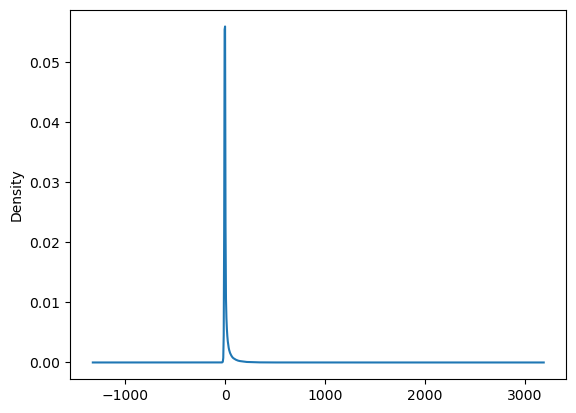

In [10]:

df_delay['dep_delay'].plot(kind='density') # In blue


## Shapiro Normality Test

In [50]:
stat, p = shapiro(df_delay['dep_delay'])
print('Shapiro-Wilk test statistics: %.3f, p-value: %.3f' % (stat, p))

Shapiro-Wilk test statistics: 0.375, p-value: 0.000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### As per the results Shapiro-Wilk test statistics: 0.375, p-value: 0.000 , p-value is less than 0.005 

<AxesSubplot:ylabel='Frequency'>

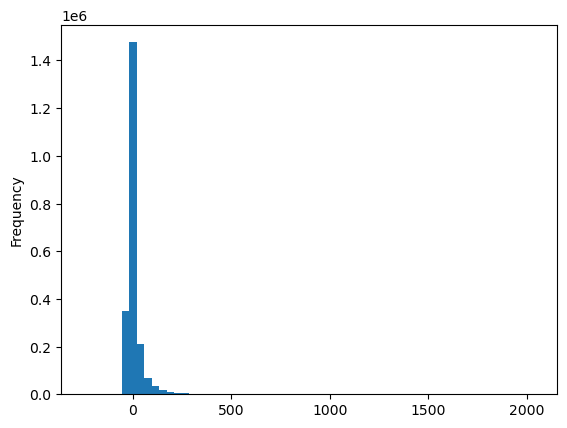

In [63]:
df_delay['arr_delay'].plot(kind='hist',bins=60)

<AxesSubplot:ylabel='Frequency'>

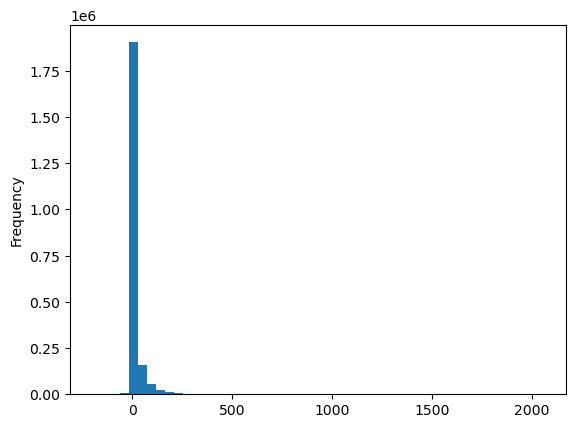

In [64]:
df_delay['dep_delay'].plot(kind='hist',bins=50)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [13]:
df_delay['month'] = pd.DatetimeIndex(df_delay['fl_date']).month
df_delay['year'] = pd.DatetimeIndex(df_delay['fl_date']).year

C:\Users\nasir\AppData\Local\Temp\ipykernel_21788\217336326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['month'] = pd.DatetimeIndex(df_delay['fl_date']).month
C:\Users\nasir\AppData\Local\Temp\ipykernel_21788\217336326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delay['year'] = pd.DatetimeIndex(df_delay['fl_date']).year


In [14]:
df_delay.head()

,fl_date,dep_delay,arr_delay,month,year
0,2019-01-08,-13.0,-34.0,1,2019
1,2018-05-04,-4.0,-14.0,5,2018
2,2019-02-11,53.0,66.0,2,2019
3,2018-01-16,-2.0,-11.0,1,2018
4,2019-06-27,36.0,21.0,6,2019


In [24]:
avg_delay = df_delay.groupby(['year', 'month'])['dep_delay'].mean()
med_delay = df_delay.groupby(['year', 'month'])['dep_delay'].median()

In [25]:
avg_delay_df = avg_delay.reset_index()
med_delay_df = med_delay.reset_index()

Text(0.5, 1.0, 'Average Monthly Departure Delay by Year')

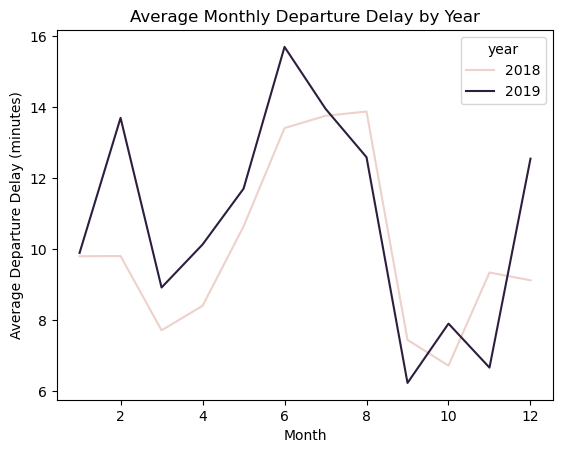

In [98]:
sns.lineplot(data=avg_delay_df, x='month', y='dep_delay', hue='year')


# Set the x and y axis labels and title
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Monthly Departure Delay by Year')

Text(0.5, 1.0, 'Median Monthly Departure Delay by Year')

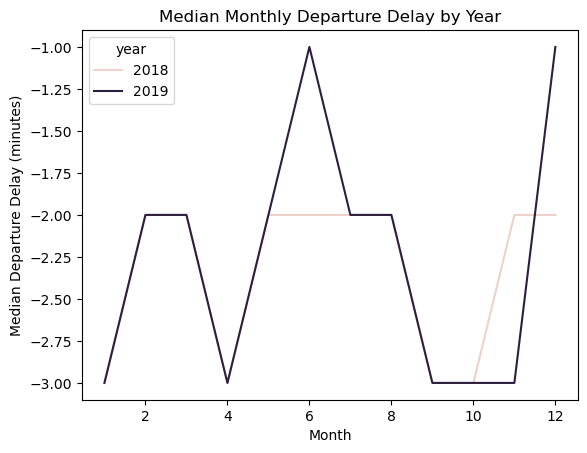

In [31]:
sns.lineplot(data=med_delay_df, x='month', y='dep_delay', hue='year')
# Set the x and y axis labels and title
plt.xlabel('Month')
plt.ylabel('Median Departure Delay (minutes)')
plt.title('Median Monthly Departure Delay by Year')

Text(0.5, 1.0, 'Average Monthly Departure Delay by Year')

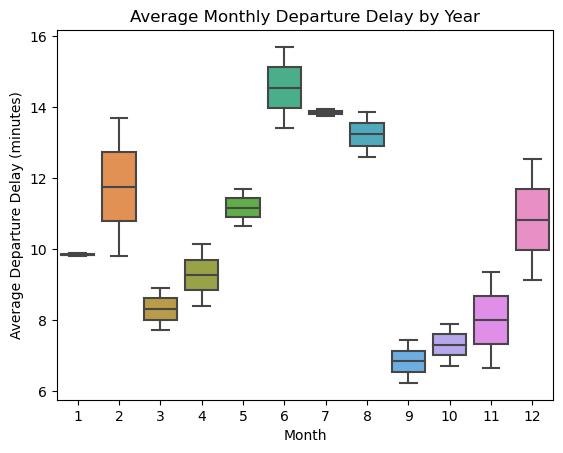

In [46]:
sns.boxplot(x='month', y='dep_delay', data=avg_delay_df)
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Monthly Departure Delay by Year')

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

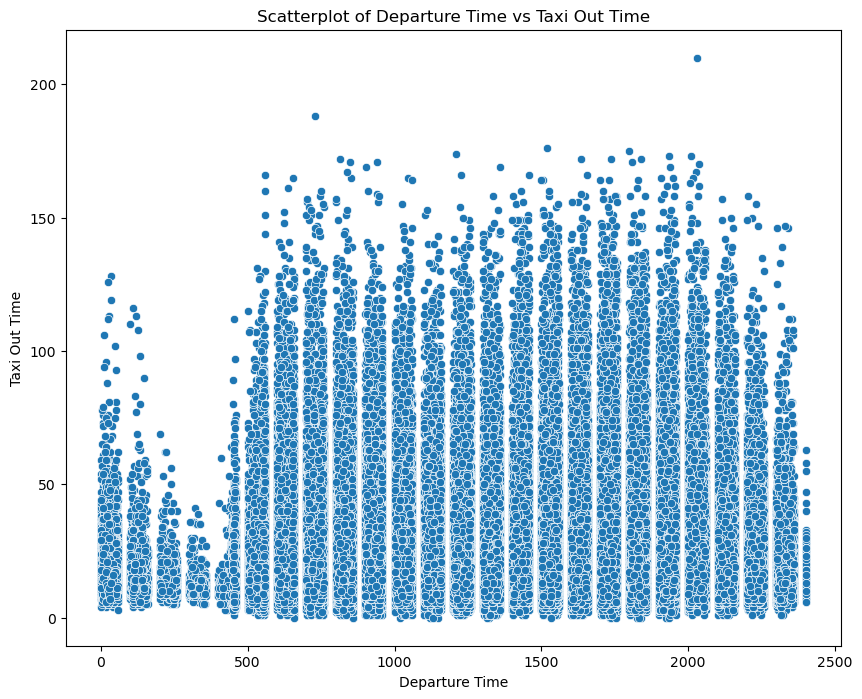

In [33]:
# Scatter plot departure time vs Taxi out time

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='dep_time', y='taxi_out')
plt.title('Scatterplot of Departure Time vs Taxi Out Time')
plt.xlabel('Departure Time')
plt.ylabel('Taxi Out Time')
plt.show()

In [1]:
# Convert dep_time to time format

df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H%M')

# Create dataframe by extracting hour and taxi out time mean

hourly_taxi_out = df.groupby(df['dep_time'].dt.hour)['taxi_out'].mean()



NameError: name 'pd' is not defined

In [44]:
hourly_taxi_out

dep_time
1.0     16.215565
2.0     15.596260
3.0     14.402929
4.0     14.731157
5.0     15.966282
6.0     16.802162
7.0     17.798121
8.0     19.351852
9.0     18.467124
10.0    17.717654
11.0    17.207380
12.0    16.862433
13.0    16.637988
14.0    16.855367
15.0    17.582934
16.0    17.306181
17.0    17.815885
18.0    18.408128
19.0    17.548621
20.0    18.180643
21.0    17.545562
22.0    17.108315
23.0    16.617396
Name: taxi_out, dtype: float64

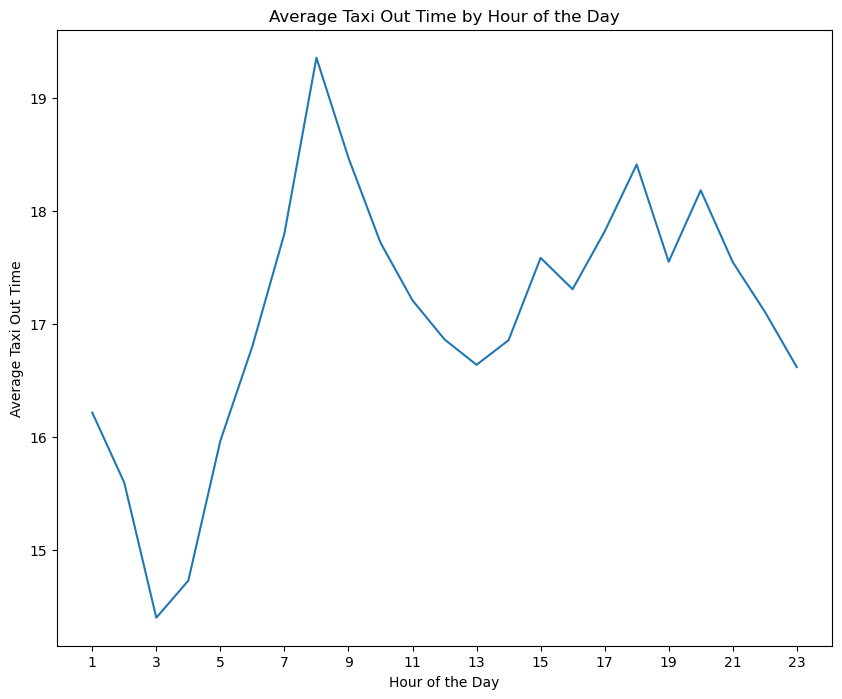

In [96]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=hourly_taxi_out.index, y=hourly_taxi_out.values)
plt.title('Average Taxi Out Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Taxi Out Time')

# set xticks interval to 2 hours
plt.xticks(hourly_taxi_out.index[::2])
plt.show()

### We observed that the between  7 -9 am has the highest taxi time

### Calculating total number of flights per hour 

In [75]:
hourly_flights = df.groupby(df['dep_time'].dt.hour)['flights'].sum()


In [71]:
hourly_flights

dep_time
1.0       1452
2.0       1818
3.0       2117
4.0       7443
5.0      87876
6.0     138563
7.0     133070
8.0     136370
9.0     127311
10.0    130783
11.0    134854
12.0    135701
13.0    122681
14.0    126057
15.0    130737
16.0    122839
17.0    135937
18.0    123797
19.0    115949
20.0    106968
21.0     75524
22.0     61875
23.0     23063
Name: flights, dtype: int64

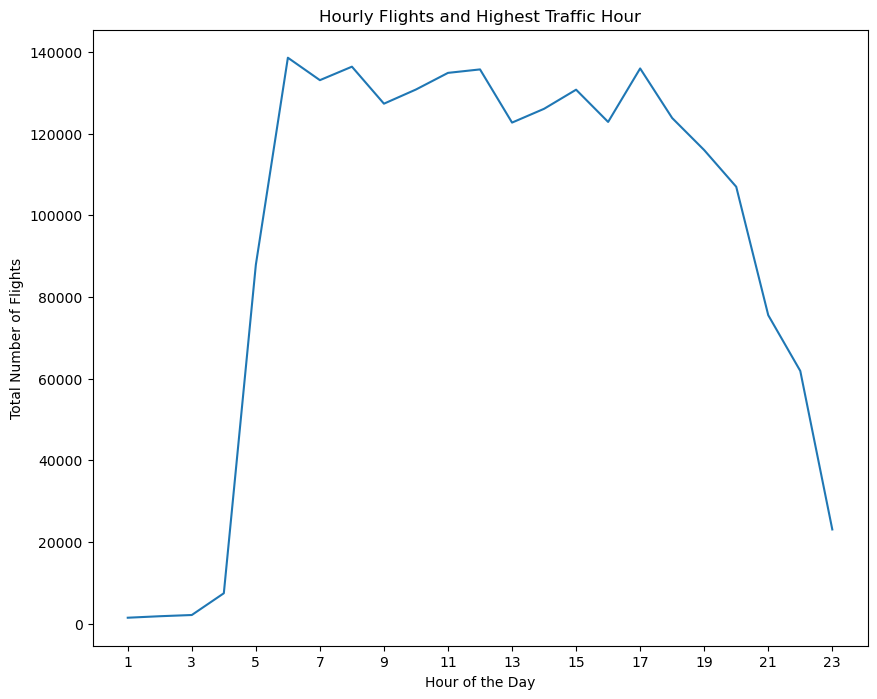

In [76]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=hourly_flights.index, y=hourly_flights.values)

plt.title('Hourly Flights and Highest Traffic Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Number of Flights')
plt.xticks(hourly_flights.index[::2])
plt.show()

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [47]:
# Calculate the number of arrival delays caused by departure delays
dep_arr_delay = df_delay.loc[(df_delay['dep_delay'] > 0) & (df_delay['arr_delay'] > 0)]
num_dep_arr_delay = len(dep_arr_delay)

# Calculate the number of all arrival delays
num_arr_delay = len(df_delay.loc[df_delay['arr_delay'] > 0])

# Calculate the percentage of arrival delays caused by departure delays
percentage_dep_arr_delay = num_dep_arr_delay / num_arr_delay * 100

print("Percentage of arrival delays caused by departure delays: {:.2f}%".format(percentage_dep_arr_delay))

Percentage of arrival delays caused by departure delays: 71.29%


#### **Task 6**: How many states cover 50% of US air traffic? 

In [83]:
 df[['origin_city_name','flights']].head()

,origin_city_name,flights
0,"Appleton, WI",1
1,"Washington, DC",1
2,"White Plains, NY",1
3,"Sault Ste. Marie, MI",1
4,"Burbank, CA",1


In [82]:
# extract the state code from the origin airport

df['origin_state'] = df['origin_city_name'].str.split(',').str[1].str.strip()

In [87]:
# count the number of flights departing from each state
state_counts = df.groupby('origin_state')['flights'].count().reset_index(name='num_flights')

In [88]:
state_counts.head()

,origin_state,num_flights
0,AK,11132
1,AL,12002
2,AR,9072
3,AZ,56970
4,CA,240279


In [89]:
# calculate the percentage of flights from each state
state_counts['pct_flights'] = state_counts['num_flights'] / state_counts['num_flights'].sum() * 100

In [90]:
# sort the states in descending order by their percentage of air traffic
state_counts = state_counts.sort_values('pct_flights', ascending=False)


In [91]:
state_counts.head()

,origin_state,num_flights,pct_flights
4,CA,240279,10.998205
44,TX,215873,9.881078
8,FL,158715,7.264805
13,IL,137106,6.275704
9,GA,116547,5.334664


In [92]:
# calculate the cumulative sum of the percentage of flights
state_counts['cum_pct_flights'] = state_counts['pct_flights'].cumsum()

In [93]:

# find the number of states that cover 50% of air traffic
num_states = len(state_counts[state_counts['cum_pct_flights'] <= 50])

print(f"{num_states} states cover 50% of US air traffic.")

7 states cover 50% of US air traffic.


#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [100]:
df['distance'].max()

5095

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [103]:
# Find the top 10 busiest airports by number of flights
top_airports = df.groupby('origin_city_name')['flights'].count().sort_values(ascending=False).head(10)

In [104]:
top_airports.head()

origin_city_name
Chicago, IL              130820
Atlanta, GA              109133
New York, NY              80994
Dallas/Fort Worth, TX     80132
Denver, CO                76196
Name: flights, dtype: int64

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

## Calculating the average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [ ]:
# Convert 'fl_date'  to date format
df['fl_date'] = pd.to_datetime(df['fl_date'])

# Group data by month / carrier and calculate sum 
monthly_delays = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['arr_delay', 'dep_delay'].sum()



In [112]:
monthly_delays.head()

arr_delay  dep_delay
fl_date fl_date mkt_unique_carrier                      
2018    1       AA                   100442.0   204086.0
                AS                   -16283.0      738.0
                B6                    47989.0    64801.0
                DL                    54291.0   221416.0
                F9                    11514.0    19932.0

In [113]:
# Number of flights per month and carrier
num_flights = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['flights'].count()



In [114]:
num_flights.head()

fl_date  fl_date  mkt_unique_carrier
2018     1        AA                    22090
                  AS                     3871
                  B6                     3278
                  DL                    17989
                  F9                     1275
Name: flights, dtype: int64

In [115]:
# Divide sum of delays by number of flights to get average delay per month and carrier
average_monthly_delay = monthly_delays.div(num_flights, axis=0)


In [124]:
average_monthly_delay.head()

arr_delay  dep_delay
fl_date fl_date mkt_unique_carrier                      
2018    1       AA                   4.546944   9.238841
                AS                  -4.206407   0.190648
                B6                  14.639719  19.768456
                DL                   3.018011  12.308411
                F9                   9.030588  15.632941

###  Calculating the distance covered monthly by different air carriers

In [129]:
monthly_distance = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['distance'].sum()

In [138]:
monthly_distance.head()

fl_date  fl_date  mkt_unique_carrier
2018     1        AA                    15553484
                  AS                     3353834
                  B6                     3476811
                  DL                    12354902
                  F9                     1369555
Name: distance, dtype: int64

### Find out number of passengers that were carried by different air carriers monthly

In [141]:
# monthly_passengers = df.groupby([df['fl_date'].dt.year, df['fl_date'].dt.month, 'mkt_unique_carrier'])['passengers'].sum()

In [145]:
df['arr_delay'].corr

<bound method Series.corr of 0         -34.0
1         -14.0
2          66.0
3         -11.0
4          21.0
           ... 
2184706     8.0
2184707     2.0
2184708    41.0
2184709     0.0
2184710     8.0
Name: arr_delay, Length: 2184711, dtype: float64>